### Student Information
Name: 林宜德

Student ID: B11109040(NTUST)

GitHub ID: davenl9i2

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [299]:
#setup environment
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
nltk.download("punkt_tab")
from sklearn.utils import Bunch
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
import helpers.data_mining_helpers as dmh
%load_ext autoreload
%autoreload 2
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
c:\Users\stp09\gg\DM2025Labs\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\stp09\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\stp09\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [300]:
### Begin Assignment Here
#load the new data set as as a sklearn-like Bunch object
dataset = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
#data preparation
dataset = dataset[['text', 'label']]

categories = {
    -1.0: "negative",
     0.0: "neutral",
     1.0: "positive"
}

reddit_train = Bunch(
    data=dataset['text'].tolist(),    
    target=dataset['label'].tolist(),   
    target_names=list(categories.values())  
)

## exercise1: print out the frist three data
for i in range(3):
    print(f"NO.{i+1} ：")
    print("\n".join(reddit_train.data[i].split("\n")))

#data transformation: convert object into pandas dataframe
X = pd.DataFrame({
    "text": reddit_train.data,
    "label": reddit_train.target
})#create a dataframe with two columns: text and label

label_map = { -1.0: "negative", 0.0: "neutral", 1.0: "positive" }#descriptive representation

X["category"] = X["label"].map(label_map)#add category to the dataframe

NO.1 ：
Calls on retards
NO.2 ：
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
NO.3 ：
Seeing lots of red in the ticker.


In [301]:
## exercise2: some querying techniques

#X[X["category"] == "neutral"].head() #show the first five records where category is neutral

#X.iloc[:10, :2] #show the first ten records and first two columns

X[X["category"].isin(["neutral", "positive"])]#show all records where category is neutral or positive

,text,label,category
1,Stunt as in like why did they even make a big ...,0.0,neutral
2,Seeing lots of red in the ticker.,0.0,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,neutral
7,Confirmed not a trap. Its been like this for p...,0.0,neutral
...,...,...,...
841,So countries “begging to stop the tariffs” and...,1.0,positive
842,Invest now it is going to shoot up tomorrow,1.0,positive
843,Where can I read this?,0.0,neutral
844,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.0,neutral


In [302]:
## exercise3: fetch record = negative (every 10th record and show frist five)
X[X["category"] == "negative"][::10][0:5]

,text,label,category
0,Calls on retards,-1.0,negative
25,"You see, Target, pissing off a good chunk of y...",-1.0,negative
62,Comedy gold :)),-1.0,negative
95,Japan and the UK are the two largest holders o...,-1.0,negative
125,Trump is like the annoying little brother (wit...,-1.0,negative


In [303]:
#check missing value 
'''
X.isnull().apply(lambda x: dmh.check_missing_values(x))
'''
## exercise4: calculate the missing values in every record
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [304]:
#dealing with missing value
'''
X.isnull().apply(lambda x: dmh.check_missing_values(x))#check if there's any missing value
'''
X.dropna(inplace=True)#delete missing value
X.isnull().apply(lambda x: dmh.check_missing_values(x))#checking again

,text,label,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [ ]:
# #dealing with duplicate data

len(X)#check how many records(847)
sum(X.duplicated())#check how many duplicate data(23)

'''
X.drop_duplicates(keep='first', inplace=True)#delete duplicate data and keep the first one
X.reset_index(drop=True, inplace=True)#reset the index after deleting duplicate data
'''

#sum(X.duplicated())#check how many duplicate data(0)
len(X)#check how many records(824)

847

<Axes: title={'center': 'Category distribution'}, xlabel='category'>

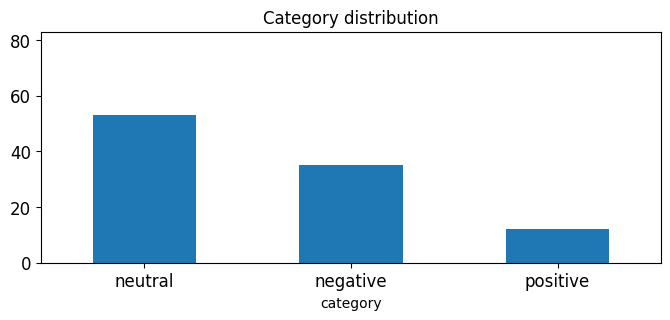

In [306]:
#sampling
X_sample = X.sample(n=100)
## exercise7: plot the category distribution

#print(X.category.value_counts())#check how many records in each category
X_sample.category.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, X_sample.category.value_counts().max()+30],
                                           rot = 0, fontsize = 12, figsize = (8,3))

<Axes: title={'center': 'Category distribution'}, xlabel='category'>

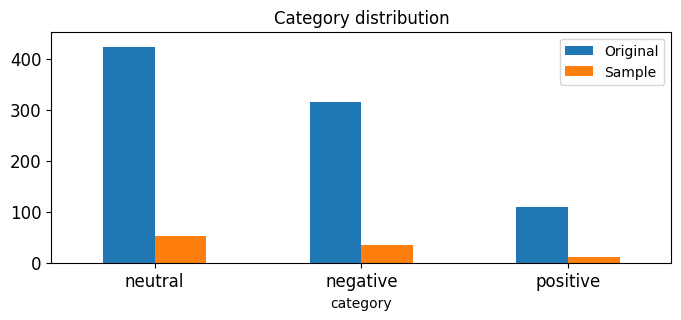

In [307]:
## exercise8: plot the side by side category distribution
x_counts_c = X.category.value_counts()
x_sample_counts = X_sample.category.value_counts()

df_compare = pd.DataFrame({
    'Original': x_counts_c,
    'Sample': x_sample_counts
})

df_compare.plot(kind = 'bar',
   title = 'Category distribution',
   ylim = [0, x_counts_c.max()+30], 
   rot = 0, fontsize = 12, figsize = (8,3))

In [308]:
#feature creation
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))#create unigrams to store words in text each record
list(X[0:1]['unigrams'])#print all the unigrams in the first record

[['Calls', 'on', 'retards']]

In [309]:
#feature subet selection
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [310]:
## exercise9: turn the array[0] text document into a tokenized text using the build_analyzer()
analyze = count_vect.build_analyzer()#create an analyzer
analyze(X.text[0])

['calls', 'on', 'retards']

In [311]:
## exercise10: represent the '1' from vocabulary in the array[1] text document
print(X_counts.shape)#(824, 4346)

print(count_vect.get_feature_names_out()[38:39])#'17th'

print(X_counts[0:5, 500:550].toarray())#check the 500-550 columns in the first five records
indices = X_counts[1, 500:550].nonzero()[1]
print(count_vect.get_feature_names_out()[indices])

(847, 4346)
['17th']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
['17th']


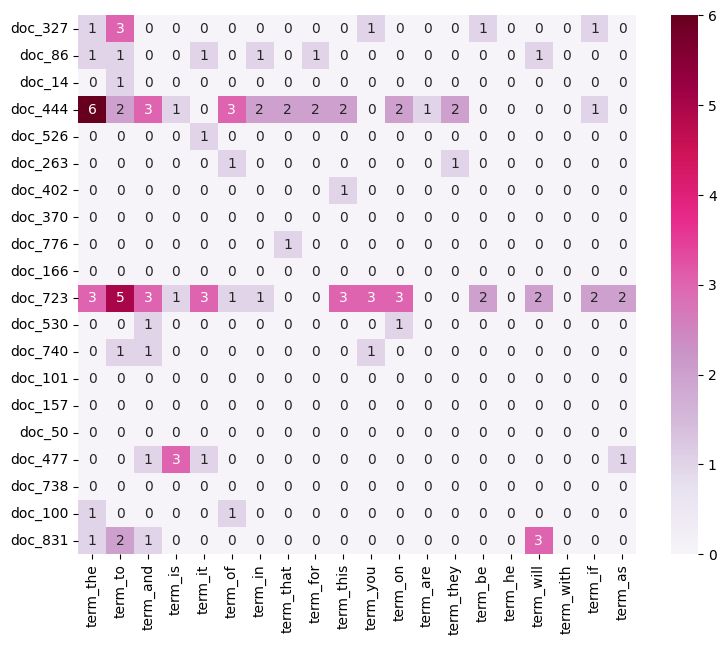

In [312]:
## exercise11: Randomly select 20 documents and plot the frequency of the top 20 terms in these documents

X_sample20 = X.sample(n=20)#randomly select 20 documents

tf_df = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": np.asarray(X_counts.sum(axis=0)).ravel()
})#create a dataframe to store the term and its frequency
top_terms = tf_df.sort_values("frequency", ascending=False).head(20)#get the top 20 terms with highest frequency

plot_x = ["term_"+str(i) for i in top_terms["term"]]
plot_y = ["doc_"+ str(i) for i in X_sample20.index.tolist()]

plot_z = X_counts[X_sample20.index, :][:, top_terms.index].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=df_todraw.values.max(), annot=True)

In [313]:
## exercise12: use plotly to plot the frequency of the top 300 terms in the whole document
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

fig = px.bar(x=count_vect.get_feature_names_out()[:300], 
              y=term_frequencies[:300],
             labels={'x': 'Term', 'y': 'Frequency'})
fig.show()

In [314]:
## exercise13: reduce the number of terms efficiently
count_vect_ns = CountVectorizer(stop_words='english',min_df=0.01)#filter the stop words and terms that appear in less than 1% of documents
X_counts_ns = count_vect_ns.fit_transform(X.text)

term_freqs = np.asarray(X_counts_ns.sum(axis=0)).ravel()

tf_df = pd.DataFrame({
    "term": count_vect_ns.get_feature_names_out(),
    "frequency": np.asarray(X_counts_ns.sum(axis=0)).ravel()
})


fig = px.bar(x=tf_df["term"][:300], 
              y=tf_df["frequency"][:300],
             labels={'x': 'Term', 'y': 'Frequency'})
fig.show()

In [315]:
## exercise14:
count_vect_ns = CountVectorizer(stop_words='english')#filter the stop words
X_counts_ns = count_vect_ns.fit_transform(X.text)

term_freqs = np.asarray(X_counts_ns.sum(axis=0)).ravel()

tf_df = pd.DataFrame({
    "term": count_vect_ns.get_feature_names_out(),
    "frequency": np.asarray(X_counts_ns.sum(axis=0)).ravel()
})
df_sorted = tf_df.sort_values("frequency", ascending=False)

fig = px.bar(x=df_sorted["term"][:300], 
              y=df_sorted["frequency"][:300],
             labels={'x': 'Term', 'y': 'Frequency'})
fig.show()


C:\Users\stp09\AppData\Local\Temp\ipykernel_24152\4078351355.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



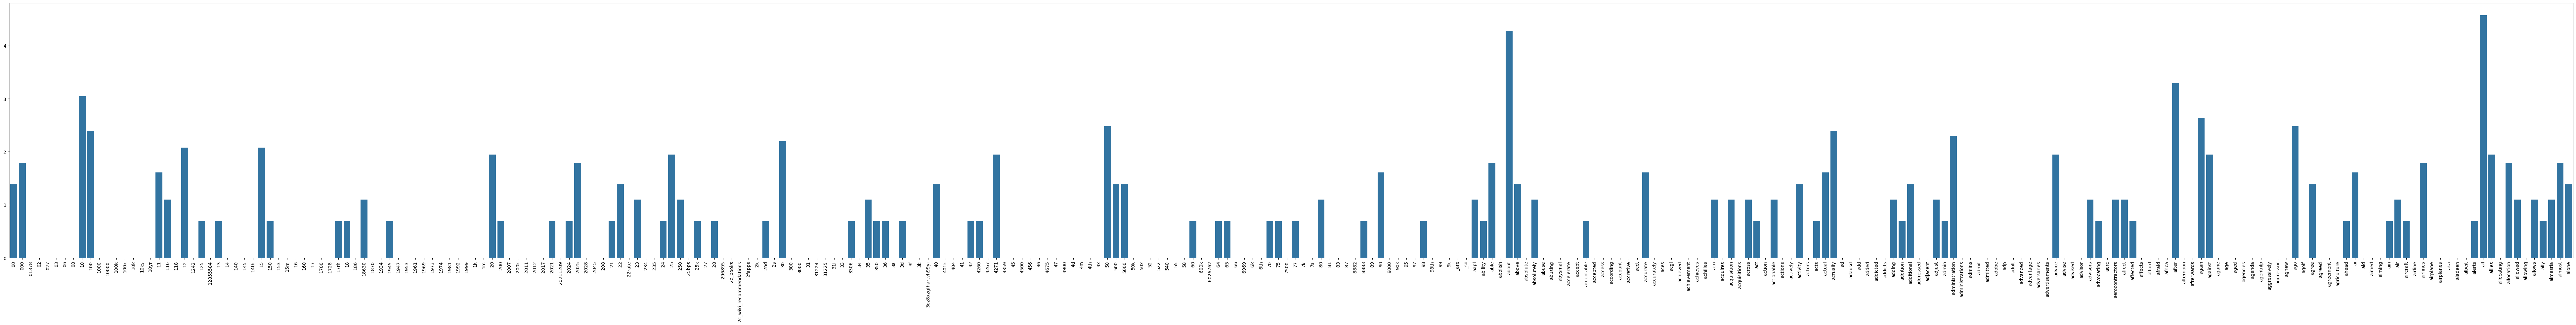

In [316]:
#log version
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

# Phase 2

In [317]:
### Begin Assignment Here